In [1]:
import numpy as np
import tensorflow as tf
import os

from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from matplotlib import pyplot as plt

In [2]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


5


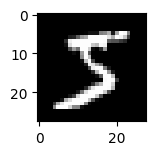

In [3]:
# plot first few images
for i in range(1):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    print(train_labels[i])
# show the figure
plt.show()

In [4]:
train_images[0].shape

(28, 28)

In [5]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Angel Test Model

In [6]:
angel_model = models.Sequential()
angel_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
angel_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
angel_model.add(layers.AveragePooling2D((2, 2)))
angel_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
angel_model.add(layers.Flatten())
angel_model.add(layers.Dense(64, activation='relu'))
angel_model.add(layers.Dense(10))

In [7]:
angel_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                        

In [8]:
angel_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

angel_history = angel_model.fit(train_images, train_labels, batch_size=32, epochs=15,
                    callbacks=callback, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 [==============================] - 20s 5ms/step - loss: 0.1189 - accuracy: 0.9641 - val_loss: 0.0459 - val_accuracy: 0.9842
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0402 - accuracy: 0.9879 - val_loss: 0.0389 - val_accuracy: 0.9875
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0355 - val_accuracy: 0.9888
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0293 - val_accuracy: 0.9904
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0472 - val_accuracy: 0.9878
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0324 - val_accuracy: 0.9909
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0319 - val_accurac

#### Evaluate Angel's Model

313/313 - 1s - loss: 0.0319 - accuracy: 0.9908 - 1s/epoch - 4ms/step


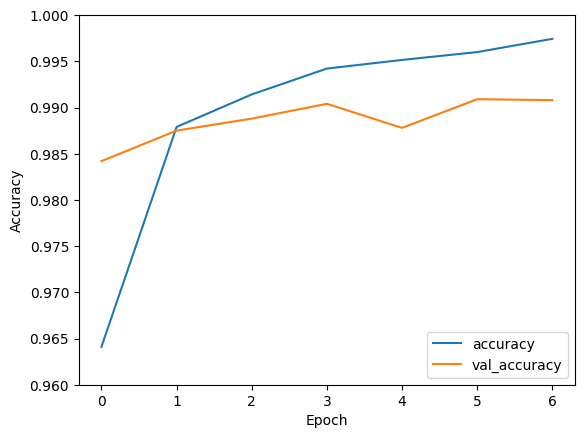

In [10]:
plt.plot(angel_history.history['accuracy'], label='accuracy')
plt.plot(angel_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.96, 1])
plt.legend(loc='lower right')

test_loss, test_acc = angel_model.evaluate(test_images,  test_labels, verbose=2)

In [9]:
# Save model
angel_model.save('angel_model')

INFO:tensorflow:Assets written to: angel_model\assets


### John Test Model

In [ ]:
john_model = models.Sequential()
john_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
john_model.add(layers.AveragePooling2D((2, 2)))
john_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
john_model.add(layers.AveragePooling2D((2, 2)))
john_model.add(layers.Flatten())
john_model.add(layers.Dense(64, activation='relu'))
john_model.add(layers.Dense(10))

In [ ]:
john_model.summary()

In [ ]:
john_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

john_history = john_model.fit(train_images, train_labels, batch_size=32, epochs=15,
                    callbacks=callback, validation_data=(test_images, test_labels))

#### Evaluate John's Model

In [ ]:
plt.plot(john_history.history['accuracy'], label='accuracy')
plt.plot(john_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.96, 1])
plt.legend(loc='lower right')

test_loss, test_acc = john_model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
john_model.save('john_model')

### Justin Test Model

In [ ]:
justin_model = models.Sequential()
justin_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
justin_model.add(layers.Dropout(0.2))
justin_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
justin_model.add(layers.AveragePooling2D((2, 2)))
justin_model.add(layers.Flatten())
justin_model.add(layers.Dense(64, activation='relu'))
justin_model.add(layers.Dense(10))

In [ ]:
justin_model.summary()

In [ ]:
justin_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

justin_history = justin_model.fit(train_images, train_labels, batch_size=32, epochs=15,
                    callbacks=callback, validation_data=(test_images, test_labels))

In [ ]:
plt.plot(justin_history.history['accuracy'], label='accuracy')
plt.plot(justin_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.96, 1])
plt.legend(loc='lower right')

test_loss, test_acc = justin_model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
justin_model.save('justin_model')

### Load Models

Here we load models into single ensemble model as list of tuples

In [ ]:
import random
import os

In [ ]:
model_names = ['angel_model', 'john_model', 'justin_model']
trained_models = {}

for name in model_names:
    if os.path.isdir(name):
        trained_models[name] = models.load_model(name)
    else:
        print(f"Invalid model name {name}")


In [ ]:
runs = 5
for _ in range(runs):

    random_index = random.randint(0, len(test_images) -1)
    random_image = test_images[random_index]
    image_label = test_labels[random_index]
    model_predictions = [None] * len(trained_models.keys())
    ensemble_predictions = {}

    # Use each individual model to predict
    for i, (name, model) in enumerate(trained_models.items()):
        model_predictions[i] = np.argmax(model.predict(tf.reshape(random_image, shape=[1, 28, 28, 1])))

    # Vote on final output
    for pred in model_predictions:
        if pred in ensemble_predictions.keys():
            ensemble_predictions[pred] += 1
        else:
            ensemble_predictions[pred] = 1
    
    print(f'True label:\t\t{image_label}')

    # All models agree
    if len(ensemble_predictions) == 1:
        print(f'Ensemble pred. label:\t{list(ensemble_predictions.keys())[0]}')
    
    # 1 model disagrees
    elif len(ensemble_predictions) == 2:
        print(f'Ensemble pred. label:\t{max(ensemble_predictions, key=ensemble_predictions.get)}')

    # all models disagree
    # need to return model with best track record
    else:
        random_pick = random.choice(list(ensemble_predictions.keys()))
        print(f'Ensemble pred. label:\t{random_pick}')


## Creating KKanji Datasets (Midterm)

#### Load datasets into training and validation sets

In [27]:
new_kkanji_midterm_dataset_train = tf.keras.utils.image_dataset_from_directory(
                                        './midterm_dataset/',
                                        validation_split=0.3,
                                        subset="training",
                                        seed=132,
                                        image_size=(64, 64),
                                        batch_size=32)

Found 40857 files belonging to 50 classes.
Using 28600 files for training.


In [28]:
new_kkanji_midterm_dataset_val = tf.keras.utils.image_dataset_from_directory(
                                        './midterm_dataset/',
                                        validation_split=0.3,
                                        subset="validation",
                                        seed=132,
                                        image_size=(64, 64),
                                        batch_size=32)

Found 40857 files belonging to 50 classes.
Using 12257 files for validation.


In [ ]:
import matplotlib.pyplot as plt

class_names = new_kkanji_midterm_dataset_train.class_names

plt.figure(figsize=(10, 10))
for images, labels in new_kkanji_midterm_dataset_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in new_kkanji_midterm_dataset_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

#### Data rescaling 

In [29]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [30]:
normalized_ds = new_kkanji_midterm_dataset_train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


#### Training Performance Optimizations

In [31]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = new_kkanji_midterm_dataset_train.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = new_kkanji_midterm_dataset_train.cache().prefetch(buffer_size=AUTOTUNE)

#### NOTE the change in input/output dimensions from the MNIST dataset

In [36]:
angel_new_model = models.Sequential()
angel_new_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
angel_new_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
angel_new_model.add(layers.AveragePooling2D((2, 2)))
angel_new_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
angel_new_model.add(layers.Flatten())
angel_new_model.add(layers.Dense(64, activation='relu'))
angel_new_model.add(layers.Dense(50))

In [37]:
angel_new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                3211328   
                                                      

In [38]:
angel_new_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

angel_history = angel_new_model.fit(new_kkanji_midterm_dataset_train, epochs=15,
                    callbacks=callback, validation_data=new_kkanji_midterm_dataset_val)

Epoch 1/15
894/894 [==============================] - 22s 24ms/step - loss: 1.4103 - accuracy: 0.7534 - val_loss: 0.3912 - val_accuracy: 0.9012
Epoch 2/15
894/894 [==============================] - 22s 24ms/step - loss: 0.2185 - accuracy: 0.9428 - val_loss: 0.3459 - val_accuracy: 0.9163
Epoch 3/15
894/894 [==============================] - 22s 24ms/step - loss: 0.0998 - accuracy: 0.9695 - val_loss: 0.4069 - val_accuracy: 0.9062
Epoch 4/15
894/894 [==============================] - 22s 24ms/step - loss: 0.0766 - accuracy: 0.9751 - val_loss: 0.4247 - val_accuracy: 0.9088
Epoch 5/15
894/894 [==============================] - 22s 24ms/step - loss: 0.0581 - accuracy: 0.9813 - val_loss: 0.4683 - val_accuracy: 0.9145


384/384 - 4s - loss: 0.4683 - accuracy: 0.9145 - 4s/epoch - 11ms/step


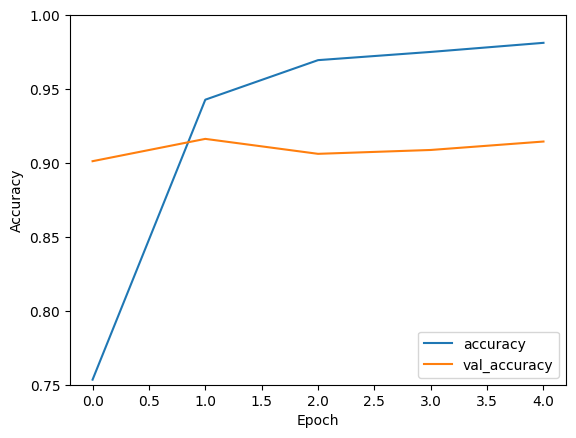

In [39]:
plt.plot(angel_history.history['accuracy'], label='accuracy')
plt.plot(angel_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.75, 1])
plt.legend(loc='lower right')

test_loss, test_acc = angel_new_model.evaluate(new_kkanji_midterm_dataset_val, verbose=2)

In [ ]:
angel_new_model.save('ange_kanji_model')

#### John Test Kanji Model

In [ ]:
john_kanji_model = models.Sequential()
john_kanji_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
john_kanji_model.add(layers.AveragePooling2D((2, 2)))
john_kanji_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
john_kanji_model.add(layers.AveragePooling2D((2, 2)))
john_kanji_model.add(layers.Flatten())
john_kanji_model.add(layers.Dense(64, activation='relu'))
john_kanji_model.add(layers.Dense(50))

john_kanji_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

justin_history = john_kanji_model.fit(new_kkanji_midterm_dataset_train, epochs=15,
                    callbacks=callback, validation_data=new_kkanji_midterm_dataset_val)

john_kanji_model.save('john_kanji_model')

#### Justin Test Kanji Model

In [ ]:
justin_kanji_model = models.Sequential()
justin_kanji_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
justin_kanji_model.add(layers.Dropout(0.2))
justin_kanji_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
justin_kanji_model.add(layers.AveragePooling2D((2, 2)))
justin_kanji_model.add(layers.Flatten())
justin_kanji_model.add(layers.Dense(64, activation='relu'))
justin_kanji_model.add(layers.Dense(50))

justin_kanji_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

justin_history = justin_kanji_model.fit(new_kkanji_midterm_dataset_train, epochs=15,
                    callbacks=callback, validation_data=new_kkanji_midterm_dataset_val)

justin_kanji_model.save('justin_kanji_model')

## Midterm Demo

#### Prepare Kanji Dataset

In [1]:
import numpy as np
import tensorflow as tf
import os
import random

import matplotlib.pyplot as plt

from tensorflow.keras import layers, models

In [ ]:
new_kkanji_midterm_dataset_train = tf.keras.utils.image_dataset_from_directory(
                                        './midterm_dataset/',
                                        validation_split=0.3,
                                        subset="training",
                                        seed=132,
                                        image_size=(64, 64),
                                        batch_size=32)

In [ ]:
new_kkanji_midterm_dataset_val = tf.keras.utils.image_dataset_from_directory(
                                        './midterm_dataset/',
                                        validation_split=0.3,
                                        subset="validation",
                                        seed=132,
                                        image_size=(64, 64),
                                        batch_size=1)

In [ ]:
class_names = new_kkanji_midterm_dataset_train.class_names

plt.figure(figsize=(8, 8))
for images, labels in new_kkanji_midterm_dataset_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from angel_code.ensemble_classifier import EnsembleClassifier

ensemble_model = EnsembleClassifier('.')

In [ ]:
ensemble_model.demo(new_kkanji_midterm_dataset_val)